In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
paths = ["SUMO_vis/SUMO_run/day1","SUMO_vis/SUMO_run/day2"]

ds = pd.DataFrame()

for path in paths:
    for file_name in os.listdir(path):
        try:
            temp = pd.read_csv(path + "//" + file_name, index_col='dateandtime',parse_dates=True)
            ds = ds.append(temp)
        except:
            ...

    

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_30236\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_30236\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_30236\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_30236\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\App

In [10]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '2T'  #one reading every 10 mins
                      )]
          ).mean()


In [11]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                   631
-182371955#0                   299
-182371966#0                   384
-182371966#4                   313
-182371966#5                   338
                              ... 
958778139#0-AddedOnRampEdge    659
958778139#1                    327
971350102#1                    771
:8771565273_2                  294
:8771565283_0                  671
Length: 355, dtype: int64

In [12]:
df = temp.fillna(temp.max())

In [13]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [14]:
#Smooth curve
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, 
                           mode='full'
                          )
    return y_smooth

In [15]:
smoothed_df = []
for cntrDf in range(0, df.shape[-1]):
    smoothed_df.append(smooth(df.values[:,cntrDf],30))

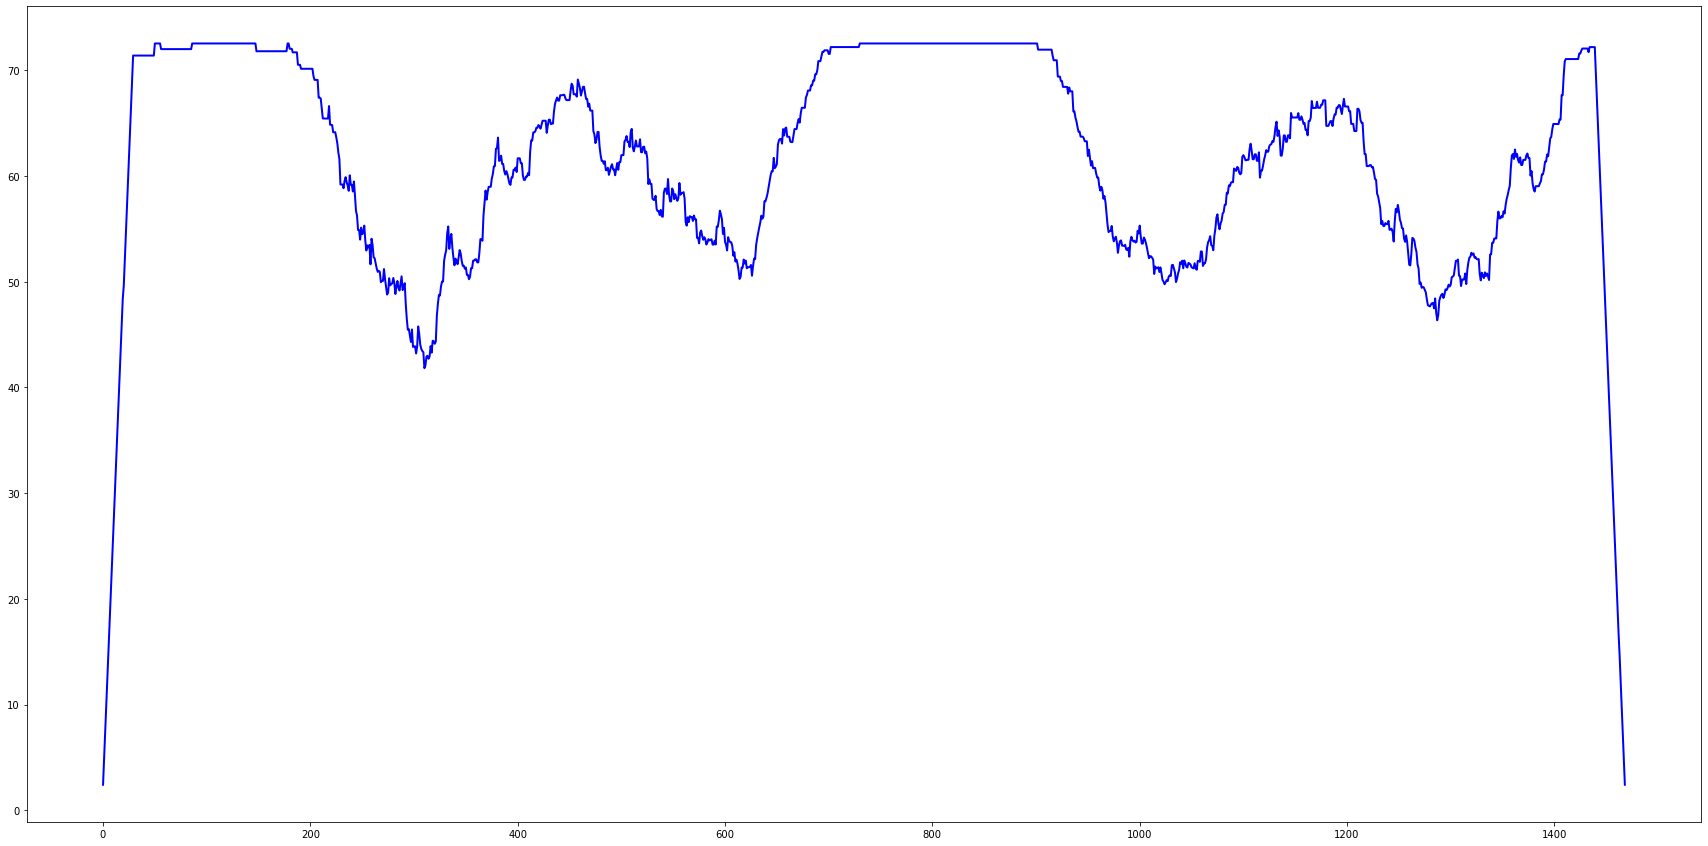

In [17]:
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
plt.plot(smoothed_df[0], 'b-', lw=2)



In [51]:
smoothed_df_0 = smoothed_df[0]

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_size = int(len(smoothed_df_0) * 0.5)
test_size = len(smoothed_df_0) - train_size

train  = smoothed_df_0[0:train_size]
test   = smoothed_df_0[train_size:]

In [53]:
history = [x for x in train]


In [83]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    
    


    output = model_fit.forecast()

    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220
predicted=72.548220, expected=72.548220


KeyboardInterrupt: 

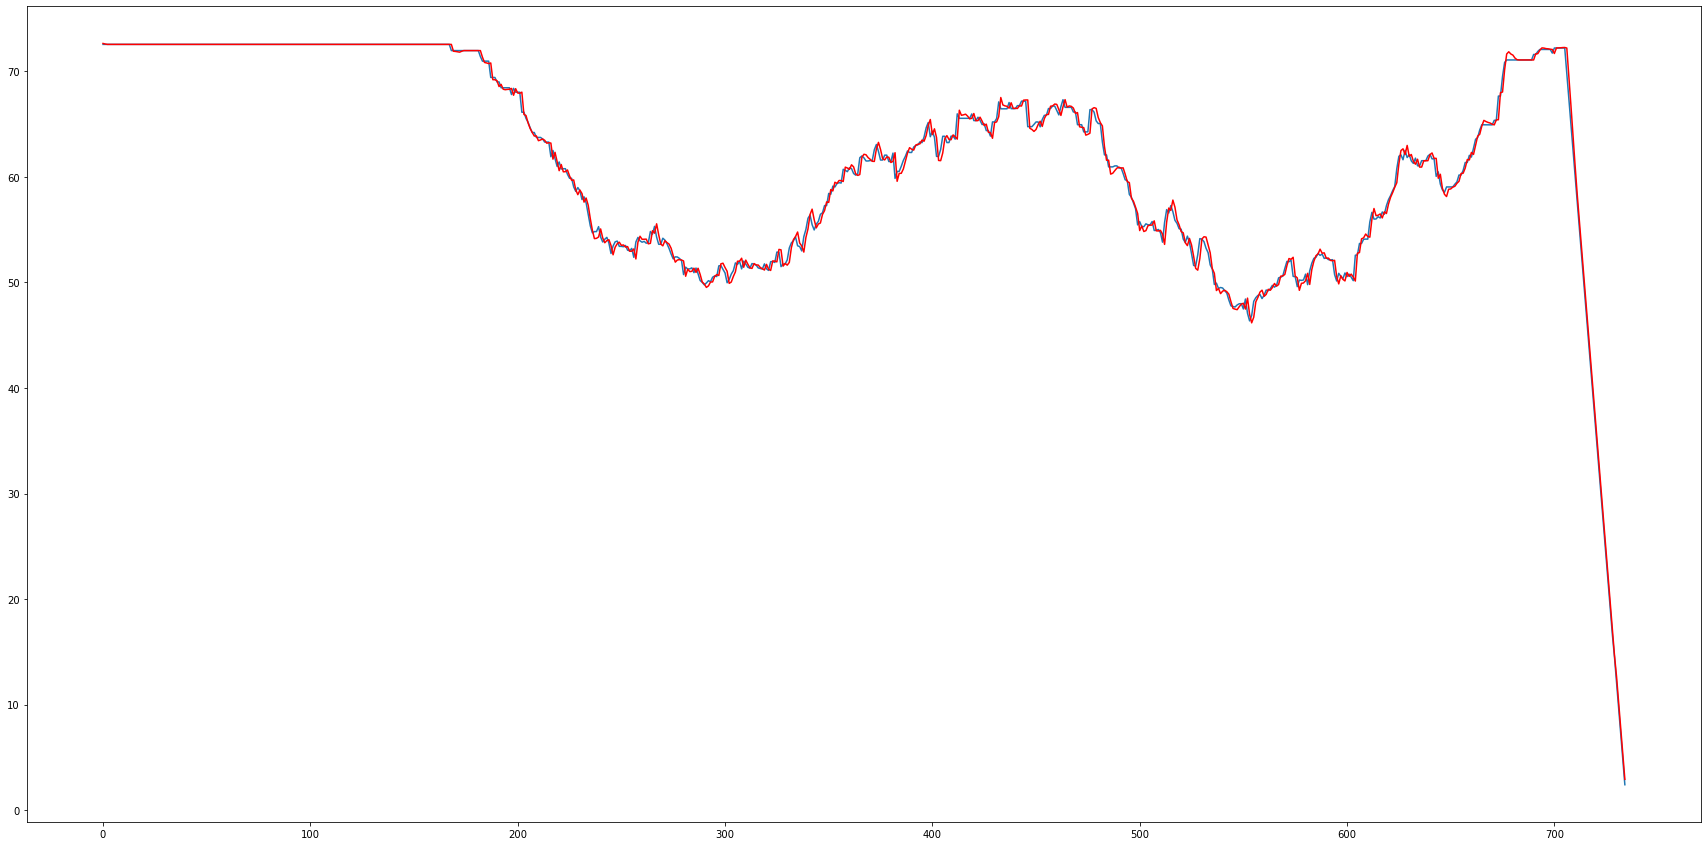

In [60]:
# evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
# plt.plot(train)
plt.plot(predictions, color='red')
plt.show()

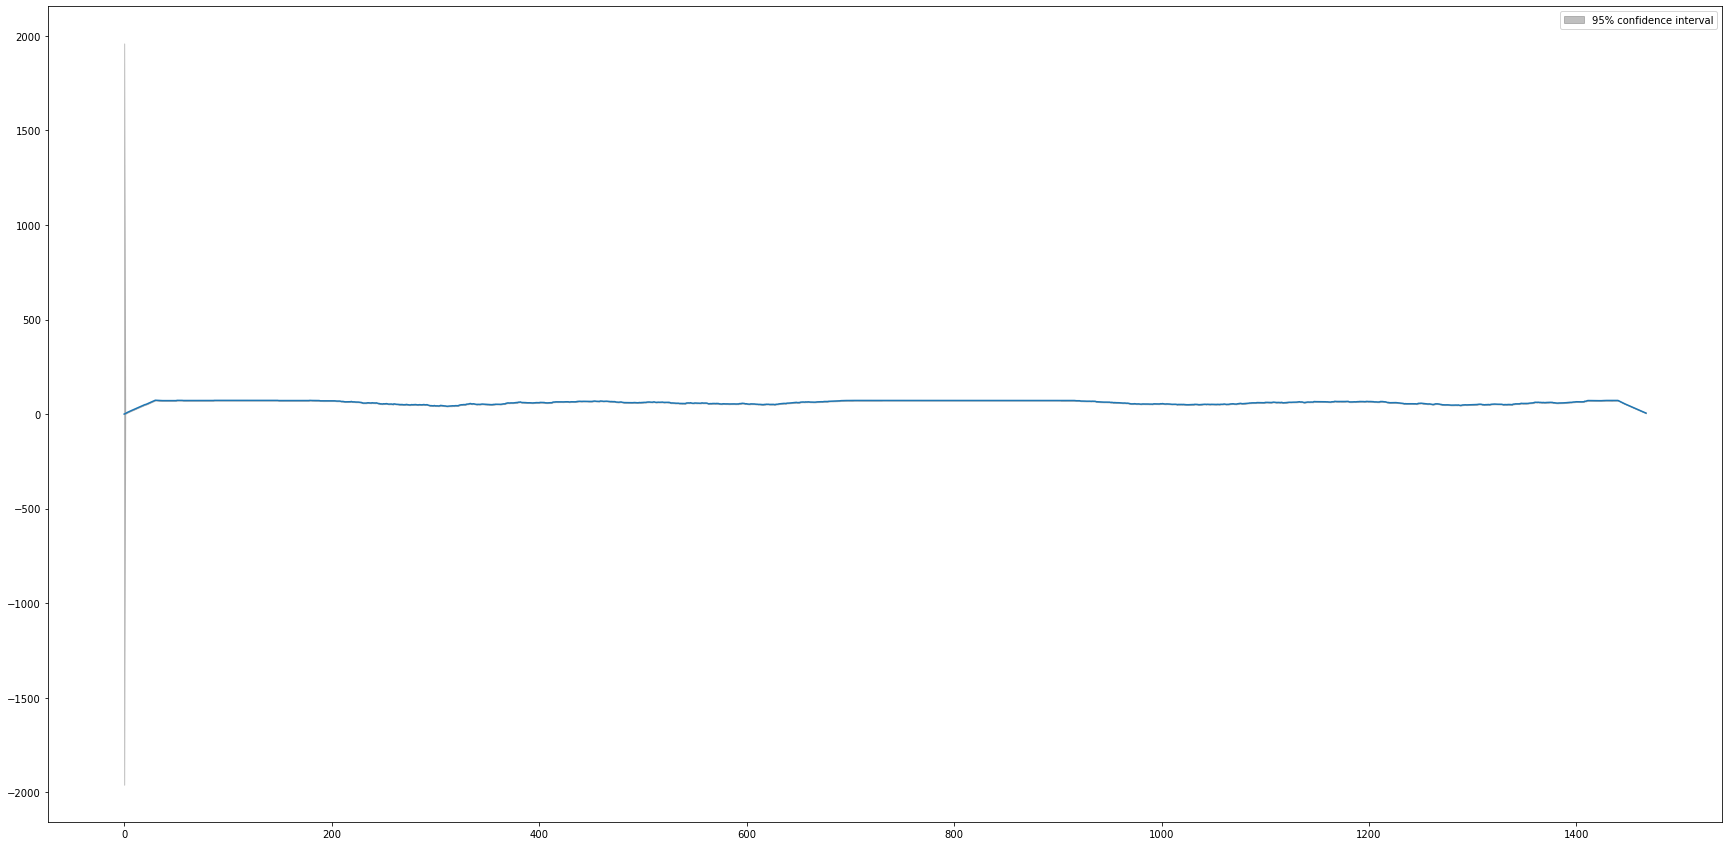

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

fig, ax = plt.subplots()
plot_predict(model_fit,  ax=ax)
plt.show()